### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import uniform

### 1. Uniform Distribution Samples

Firstly, I generate N samples from a uniform distribution

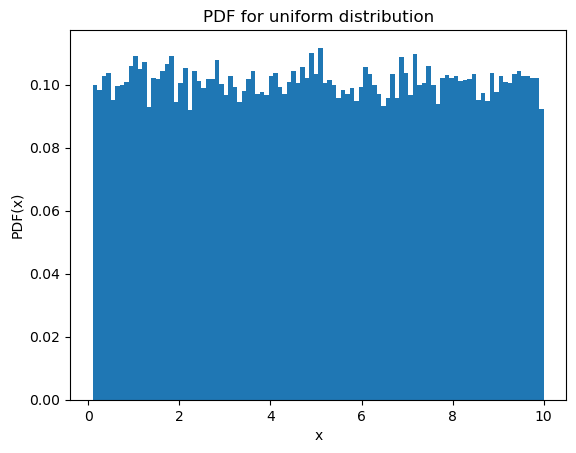

In [2]:
N = 50000
minimo = 0.1
maximo = 10
#pdf per distribuzione uniforme
x = np.random.uniform(minimo, maximo, size = N)
plt.hist(x, bins = 100, density = True)
plt.title('PDF for uniform distribution')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()

### 2. Computing $y = log_{10}(x)$ and its pdf

Then, I use them to compute the function $y = log_{10}(x)$ and to compare the latter distribution from the theoretical pdf, given by:
$$ pdf(y) = pdf(x)|\frac{dx}{dy}| = \frac{1}{x_{max}-x_{min}}|10^ylog(10)|$$ 

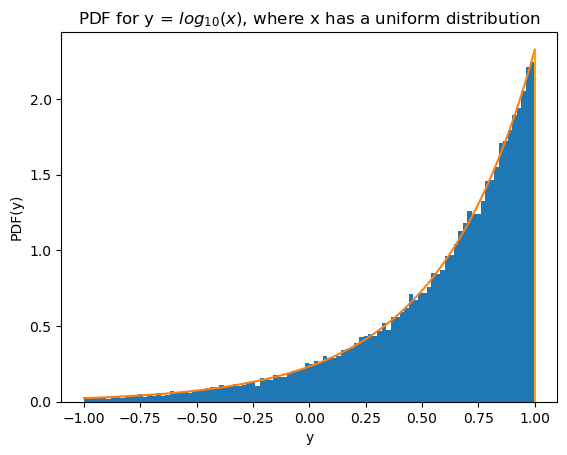

In [3]:
y = np.log10(x)
plt.hist(y, bins = 100, density = True)
plt.xlabel('y')
plt.ylabel('PDF(y)')
plt.title(r'PDF for y = $log_{10}(x)$, where x has a uniform distribution')

#calcolo pdf teorica, tramite inverso della derivata
y_py = np.linspace(min(y), max(y), N)
p_y = 1/(maximo-minimo)*np.abs((10**y_py*np.log(10)))
plt.plot(y_py, p_y)
plt.vlines(max(y), 0, max(p_y), color = 'orange')
plt.show()

Finally, I can compare the mean (median) of the logarithm of the samples and the logarithm of the mean (median) of the samples. We can see that while the first ones differ, the others are the same.

In [4]:
print('Comparison mean(log(x)) and log(mean(x)): %.04f, %.04f' %(np.mean(np.log10(x)), np.log10(np.mean(x))))
print('Comparison median(log(x)) and log(median(x)): %.04f, %.04f' %(np.median(np.log10(x)), np.log10(np.median(x))))

Comparison mean(log(x)) and log(mean(x)): 0.5851, 0.7026
Comparison median(log(x)) and log(median(x)): 0.7015, 0.7015


### 3. Computing y = $e^x$ and its pdf

I can do the same for another distribution, eg $y = e^x$.

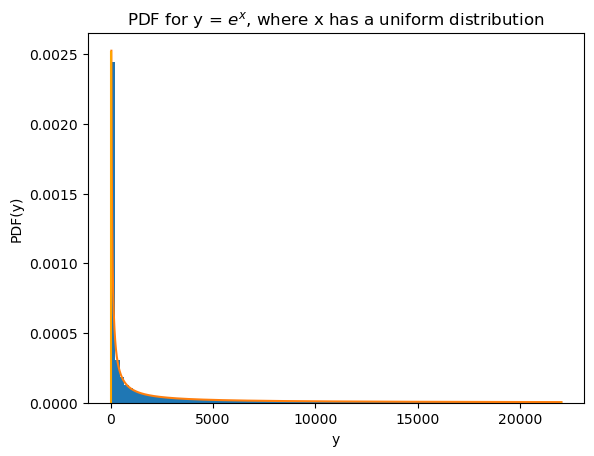

In [5]:
y = np.exp(x)
plt.hist(y, bins = 100, density = True)
plt.title(r'PDF for y = $e^{x}$, where x has a uniform distribution')
plt.xlabel('y')
plt.ylabel('PDF(y)')

y_py = np.linspace(40, max(y), N)
p_y = np.abs(1/y_py)*1/(maximo-minimo)
plt.plot(y_py, p_y)
plt.vlines(min(y), 0, max(p_y), color = 'orange')
plt.vlines(max(y), 0, min(p_y), color = 'orange');

The same results are obtained in this case for the comparison described previously.

In [6]:
print('Comparison mean(exp(x)) and exp(mean(x)): %.04f, %.04f' %(np.mean(np.exp(x)), np.exp(np.mean(x))))
print('Comparison median(exp(x)) and exp(median(x)): %.04f, %.04f' %(np.median(np.exp(x)), np.exp(np.median(x))))

Comparison mean(exp(x)) and exp(mean(x)): 2214.7025, 154.7446
Comparison median(exp(x)) and exp(median(x)): 152.8560, 152.8560


### 4. Caveat

The equality between median(f(x)) and f(median(x)) is only valid when the function is monotone. We can see this choosing the equation: $$ y = \sin(x). $$ 
This is not valid anymore, and the comparison would not return an equality between the two.

#### 4.1 Comparison between pdf

I sample two different uniform distribution: one that goes from $0$ to $\frac{\pi}{2}$, and one that goes from $0$ to $2\pi$.
The first one is monotonic on its domain, while the second one is not. To see the differences between the two distributions, I plot their histograms and their relative pdf.

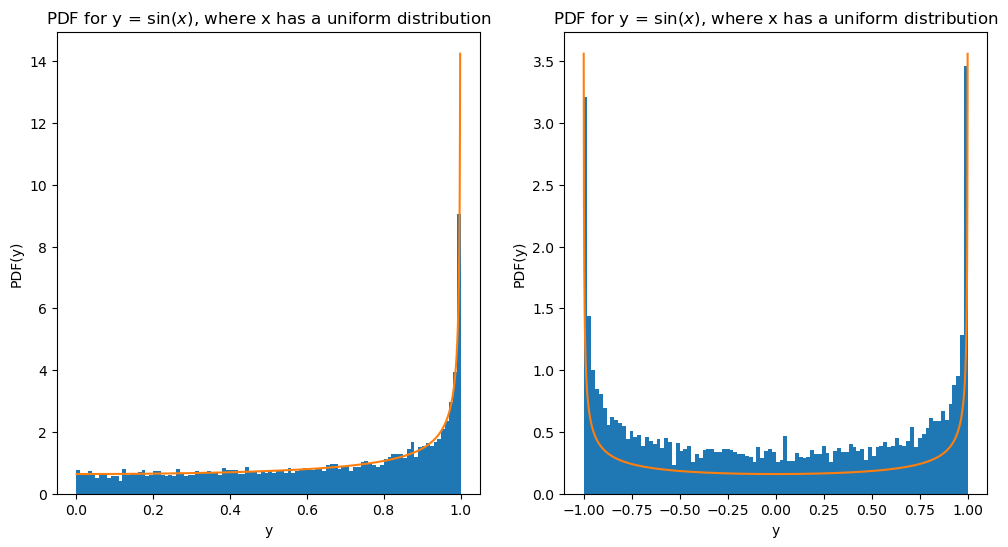

In [7]:
N = 10000
minimo = np.pi/2
maximo = np.pi
x_mono = np.random.uniform(minimo, maximo, size = N)

y_mono = np.sin(x_mono)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
plt.hist(y_mono, bins = 100, density = True)
plt.title(r'PDF for y = $\sin(x)$, where x has a uniform distribution')
plt.xlabel('y')
plt.ylabel('PDF(y)')

y_py = np.linspace(min(y_mono + 0.001), max(y_mono)-0.001, N)
p_y = np.abs(1/np.sqrt(1-y_py**2))*1/(maximo-minimo)
plt.plot(y_py, p_y);


N = 10000
minimo = 0
maximo = 2*np.pi
x_not_mono = np.random.uniform(minimo, maximo, size = N)

y_not_mono = np.sin(x_not_mono)

ax = fig.add_subplot(122)
plt.hist(y_not_mono, bins = 100, density = True)
plt.title(r'PDF for y = $\sin(x)$, where x has a uniform distribution')
plt.xlabel('y')
plt.ylabel('PDF(y)')

y_py = np.linspace(min(y_not_mono + 0.001), max(y_not_mono)-0.001, N)
p_y = np.abs(1/np.sqrt(1-y_py**2))*1/(maximo-minimo)
plt.plot(y_py, p_y);

#### 4.2 Comparison between medians

After this, I compare the median of the sin vs the sin of the median for both cases:

In [8]:
print('Comparison median(sin(x_mono)) and (sin(median(x_mono))): %.04f, %.04f' %(np.median(np.sin(x_mono)), np.sin(np.median(x_mono))))
print('Comparison median(sin(x_not_mono)) and (sin(median(x_not_mono))): %.04f, %.04f' %(np.median(np.sin(x_not_mono)), np.sin(np.median(x_not_mono))))

Comparison median(sin(x_mono)) and (sin(median(x_mono))): 0.7100, 0.7100
Comparison median(sin(x_not_mono)) and (sin(median(x_not_mono))): -0.0062, -0.0141


As we can see, in the second case the result is not equal: this is because the distribution is not monotone.